## Getting Started
---

This presentation is no help if you can't get the python packages it uses! There are a few options here. If you're not already set up, probably the easiest way to install python packages is [pip](https://pip.pypa.io/en/stable/). If you don't already have it, here are [installation instructions](https://packaging.python.org/installing/#install-pip-setuptools-and-wheel). I'm a big fan of the [anaconda](https://www.continuum.io/) python distrubution, which comes pre-loaded with basically everything I'm using today. Just use whatever works for you. 

For example, installing numpy is easy, in a command line:

pip install numpy

If you're using anaconda, you can also use their package manager:

conda install numpy

Pip is probably the preferred method, even when you're using anaconda. The packages I'm discussing today are [numpy](http://www.numpy.org/), [scipy](https://www.scipy.org/), [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), [seaborn](https://seaborn.github.io/) , [Numba](http://numba.pydata.org/) and [Cython](http://cython.org/). As far as I know, all of these are in both package managers. 

I've recently been told that pandas depends on cython and seaborn depends on pandas. 

You should therefore install cython -> pandas -> seaborn in that order. 

This talk was made using a [jupyter](http://jupyter.org/) notebook. 

## Python is slow! Why bother?
---

This is a common reason people want to avoid python, and it's half true. See for example this function that performs a matrix multiplication:

In [1]:
import math
N = 300

mat1 = [[1.5*i + j for i in range(N)] for j in range(N)]
mat2 = [[2.5*i + j for i in range(N)] for j in range(N)]

def mmult(mat1, mat2):
    mat3 = [[0.0 for i in range(N)] for j in range(N)]
    
    for i in range(N):     
        for k in range(N):  
            for j in range(N):  
                mat3[i][k] += mat1[i][j] * mat2[j][k]
    return mat3

%time m3 = mmult(mat1, mat2)

CPU times: user 4.48 s, sys: 8 ms, total: 4.48 s
Wall time: 4.48 s


Well that doesn't seem so bad! This would take longer to do by hand! It actually is pretty slow.  [Here's](https://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/)
a look at some of the reasons why. It has to do with the fact that python is dynamically typed and interpreted, rather than compiled. Additionally, the arrays in native python aren't laid out in one chunk of memory.


## It doesn't have to be this way! (Numpy section)
---

If you're going to be doing serious numerical work in python, numpy is essential. If you're doing a lot of work with arrays, the performance difference between raw python and C/C++/Fortran can easily be several orders of magnitude. Numpy is focused on fast, efficient manipulation of arrays. They can be any size, any dimension as long as your computer can store it. Numpy methods are compiled and very efficient (comparable to compiled code). Let's take a look at our matrix multiply again:

In [2]:
import numpy as np # convention

npmat1 = np.asarray(mat1) # use numpy arrays, they are contiguous in memory
npmat2 = np.asarray(mat2)

%time npmat3 = np.dot(npmat1, npmat2) # dot is used for dot product or matrix multiply

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.99 ms


In [3]:
%time eigenvalues, eigenvectors = np.linalg.eig(npmat1)
print eigenvalues

CPU times: user 300 ms, sys: 0 ns, total: 300 ms
Wall time: 93.6 ms
[  1.20525611e+05 +0.00000000e+00j  -8.40061082e+03 +0.00000000e+00j
  -3.91660718e-12 +2.36398411e-12j  -3.91660718e-12 -2.36398411e-12j
  -4.54029458e-12 +0.00000000e+00j  -1.78767356e-12 +3.64348153e-12j
  -1.78767356e-12 -3.64348153e-12j  -1.18534731e-12 +3.86293579e-12j
  -1.18534731e-12 -3.86293579e-12j   5.52351411e-14 +4.08376987e-12j
   5.52351411e-14 -4.08376987e-12j  -3.61251932e-12 +1.35767713e-12j
  -3.61251932e-12 -1.35767713e-12j  -2.29767641e-12 +2.66502596e-12j
  -2.29767641e-12 -2.66502596e-12j   3.41335884e-12 +1.45184669e-12j
   3.41335884e-12 -1.45184669e-12j   3.17976944e-12 +1.79551551e-12j
   3.17976944e-12 -1.79551551e-12j   2.50040001e-12 +2.46457017e-12j
   2.50040001e-12 -2.46457017e-12j   1.67174715e-12 +3.05188767e-12j
   1.67174715e-12 -3.05188767e-12j   9.76397849e-13 +3.25821089e-12j
   9.76397849e-13 -3.25821089e-12j   3.50259394e-12 +0.00000000e+00j
   3.45187510e-12 +0.00000000e+00j 

WHOA! Blazing fast! Morale of the story: if there is a numpy function to do it, use it! And there  is a numpy function for a lot of stuff, here's a few useful ones:

[np.linalg.eig](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.eig.html) - eigenvectors/values 

[np.zeros](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) - create an array of zeros

[np.linspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) - create an array of values spaced linearly between 2 endpoints

[np.sort](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.sort.html) - Sort an array

[np.amax](http://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html) - Return maximum value of array

[np.random.rand](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html) - create array of random values in [0, 1)

There's about 3 trillion more ... 

## A few useful tips about numpy arrays:
---
### 1) Most 'normal' operations are element-wise:

In [4]:
A = np.array([[1, 2, 3]
             ,[4, 5, 6]
             ,[7, 8, 9]])
print 10 + A

[[11 12 13]
 [14 15 16]
 [17 18 19]]


In [5]:
print 2 * A

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [6]:
print A == 5

[[False False False]
 [False  True False]
 [False False False]]


In [7]:
B = np.array([[10, 20, 30]
             ,[40, 50, 60]
             ,[70, 80, 90]])
print A + B

[[11 22 33]
 [44 55 66]
 [77 88 99]]


### 2) You can 'slice' numpy arrays

In [8]:
print A, '\n'
print A[:, 2]  # 3rd column (starts at 0)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[3 6 9]


In [9]:
print A[1, :]  #Second row

[4 5 6]


In [10]:
print A[0:2, 0:2] # Top-Left 2x2 section

[[1 2]
 [4 5]]


### 3) You can index a numpy array... with a numpy array

In [11]:
indices = np.array([0, 2])
print A

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
print A[indices]  # first and third row

[[1 2 3]
 [7 8 9]]


In [13]:
print A[:,indices]  # first and third column

[[1 3]
 [4 6]
 [7 9]]


In [14]:
indices2 = np.asarray([[True, True, False]
                     ,[False, True, True]
                     ,[False, False, False]])
print A, '\n'
print A[indices2]  # All elements where indices2 is True

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[1 2 5 6]


### 4) And you can combine operations

In [15]:
symmetric = np.array([[1, 4, 4]
                     ,[4, 1, 4]
                     ,[4, 4, 1]])

asymmetric = np.array([[1, 4, 4]
                      ,[7, 1, 4]
                      ,[42, 5, 1]])

Maybe to check if a matrix is symmetric

In [16]:
np.all(symmetric.T == symmetric)

True

In [17]:
np.all(asymmetric.T == asymmetric)  # WARNING if using floats, compare
                                    # with np.isclose(x.T, x)

False

Or to sort eigenvales and eigenvectors so that the eigenvalues are in ascending order, and you keep track of the vectors!

In [18]:
vals, vecs = np.linalg.eig(symmetric)
print vals
print vecs
print '\n'

indices_of_sorted_vals = np.argsort(vals)
print vals[indices_of_sorted_vals]     
print vecs[:, indices_of_sorted_vals]  # columns are rearranged

[-3.  9. -3.]
[[-0.81649658  0.57735027  0.19219669]
 [ 0.40824829  0.57735027 -0.7833358 ]
 [ 0.40824829  0.57735027  0.59113912]]


[-3. -3.  9.]
[[-0.81649658  0.19219669  0.57735027]
 [ 0.40824829 -0.7833358   0.57735027]
 [ 0.40824829  0.59113912  0.57735027]]


## Scipy
---

We're all scientists here, so It would be silly to avoid scipy. It's a library of scientifically relevant tools. Here's a list of some of the submodules:

Special functions (scipy.special)

Integration (scipy.integrate)

Optimization (scipy.optimize)

Interpolation (scipy.interpolate)

Fourier Transforms (scipy.fftpack)

Signal Processing (scipy.signal)

Linear Algebra (scipy.linalg)

Sparse Eigenvalue Problems with ARPACK

Compressed Sparse Graph Routines (scipy.sparse.csgraph)

Spatial data structures and algorithms (scipy.spatial)

Statistics (scipy.stats)

Multidimensional image processing (scipy.ndimage)

File IO (scipy.io)

Weave (scipy.weave)

The various python modules make it super easy to do lots of things, like making a function that returns the nth harmonic oscillator wavefunction:

In [19]:
from math import factorial, pi
from scipy.special import hermite as h

def psi(x, n):
    N = 1.0 / np.sqrt(float(2**n) * factorial(n)) * (1.0 / pi)
    return N * np.exp(-x*x / 2.0) * h(n)(x)

If I try to cover all of scipy it will get boring fast... you can look up functions as you need them

## Matplotlib
---

Matplotlib is the tool to go to for quick plotting stuff in Python. It can handle 2D, 3D, and even animations. 

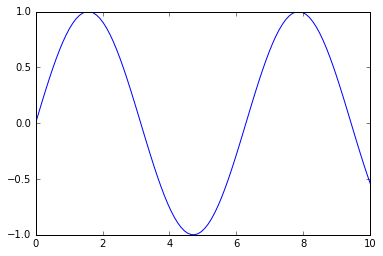

In [20]:
import matplotlib.pyplot as plt
# Jupyter  "Magic", just so you see the images in the notebook
%matplotlib inline 

fig = plt.figure(figsize=(6,4))

x = np.linspace(0, 10, 100)   # list of x from 0 to 10 by 100 steps
y = np.sin(x)                 # take the sign of each element in x
plt.plot(x, y)                # do I have to explain this one?
plt.show()

To plot multiple things at once, call plt.plot() more than once

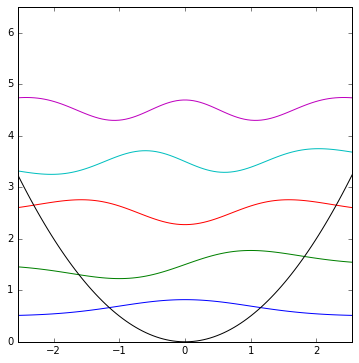

In [21]:
def plot_HO(N): # plot N wavefunctions
    fig = plt.figure(figsize=(6,6))


    ymax = N + 1.5
    xmax = math.sqrt(ymax)    # figuring out plot ranges
    x = np.linspace(-xmax, xmax, 100)

    for n in range(N):                       # from n = [0...N)
        plt.plot(x, psi(x, n) + (n + 0.5))   # Plot the wavefunction offset by
                                             # energy

    plt.plot(x, 0.5 * x*x, 'k')  # Plot the potential

    plt.xlim(-xmax, xmax)
    plt.ylim(0, ymax)
    plt.show()
plot_HO(5)

Matplotlib has functions for scatterplots, pie charts, bar graphs, heatmaps blah blah blah...

## Pandas
---

I recently started using Pandas in my research, and It's already proven incredibly useful for data analysis. The library is focused on the Series and the DataFrame. 

In [22]:
import pandas as pd

series1 = pd.Series([4, 2.5, 8, 72])
series1

0     4.0
1     2.5
2     8.0
3    72.0
dtype: float64

I don't know about you, but this isn't the most impressive thing to me... just hold on. 

Here's an example of a DataFrame, the reason I'm in love with this library

In [23]:
Cols = ['Rain', 'Temperature', 'Wind']
Dates = pd.date_range('20161020', periods=10)
data = np.random.rand(10, 3) # 3 cols 10 rows

df= pd.DataFrame(data, index=Dates, columns=Cols)
df

,Rain,Temperature,Wind
2016-10-20,0.341700,0.686504,0.587545
2016-10-21,0.418343,0.033070,0.414793
2016-10-22,0.533403,0.536207,0.070489
2016-10-23,0.421746,0.726778,0.698081
2016-10-24,0.876087,0.503391,0.706729
2016-10-25,0.234845,0.954372,0.641616
2016-10-26,0.513677,0.730851,0.098579
2016-10-27,0.439176,0.295662,0.060378
2016-10-28,0.572081,0.132797,0.939092
2016-10-29,0.830667,0.482933,0.607373


In [24]:
df['Rain']  # Grab all the stuff in 'Rain' column

2016-10-20    0.341700
2016-10-21    0.418343
2016-10-22    0.533403
2016-10-23    0.421746
2016-10-24    0.876087
2016-10-25    0.234845
2016-10-26    0.513677
2016-10-27    0.439176
2016-10-28    0.572081
2016-10-29    0.830667
Freq: D, Name: Rain, dtype: float64

In [25]:
df.loc['2016-10-23']  # locate this date

Rain           0.421746
Temperature    0.726778
Wind           0.698081
Name: 2016-10-23 00:00:00, dtype: float64

In [26]:
df.iloc[2]  # grab the 3rd row

Rain           0.533403
Temperature    0.536207
Wind           0.070489
Name: 2016-10-22 00:00:00, dtype: float64

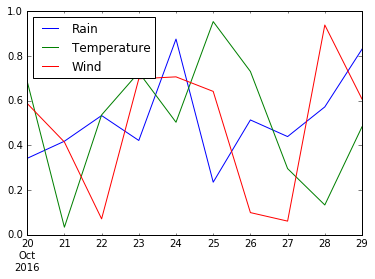

In [27]:
df.plot()  # Plot all the stuff

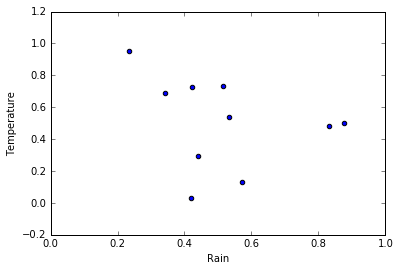

In [28]:
df.plot.scatter(x='Rain', y='Temperature')
plt.xlim(0,1)
plt.show()

You can find data by name and apply an operation to it, like checking which days had small amounts of rain:

In [29]:
df['Rain'] < 0.1

2016-10-20    False
2016-10-21    False
2016-10-22    False
2016-10-23    False
2016-10-24    False
2016-10-25    False
2016-10-26    False
2016-10-27    False
2016-10-28    False
2016-10-29    False
Freq: D, Name: Rain, dtype: bool

Hmm, that's pretty nice isn't it? What if we could easily select only the parts that satisfy our condition? ....

In [30]:
df[df['Rain'] < 0.1]

,Rain,Temperature,Wind


Ok that's pretty neat. I think this alone is useful. But we're just getting started! 

What if we could find all parts of our data frame that satisfy a given condition, then plot two other columns of that data? Say no more...

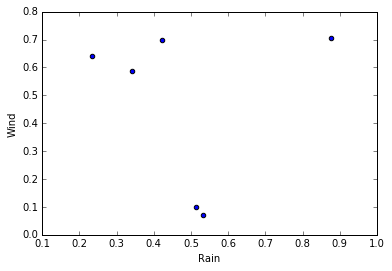

In [31]:
TempsAbove = df[df['Temperature'] > 0.5]
TempsAbove.plot.scatter('Rain', 'Wind')
plt.show()

The reason I like this library so much is that you can use the past few examples, combining them as you wish, and analyze huge amounts of data in seconds. Lately I've written a function to do a custom plot on each row of a dataframe (optionally you can apply a condition to a dataframe and pass that through). I take my output files, parse them and put them into a dataframe. This lets me go from a directory of output files to a ton of plots in seconds, with little effort. 

## Seaborn
---

Let's face it: I've been to enough talks to know that most people don't know how to make visually appealing figures. Well the good news is that you don't have to. Trust in Seaborn, for it is magnificent. 

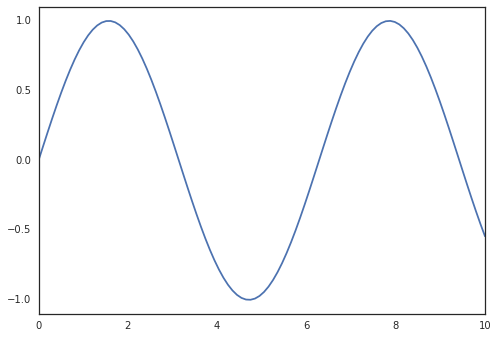

In [40]:
import seaborn as sns # importing changes defaults
plt.ylim(-1.1, 1.1)
plt.plot(x, y)

This is the default with nothing done, the library was made to have nice colorschemes out of the box, but I prefer a less intrusive background

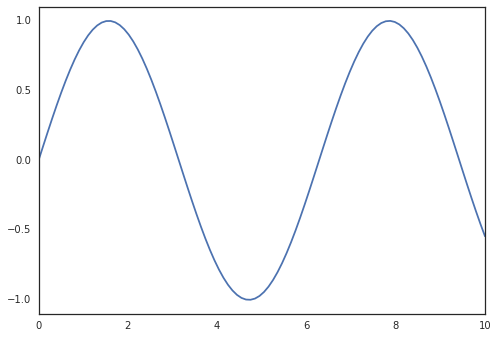

In [41]:
sns.set_style('white')
plt.ylim(-1.1, 1.1)
plt.plot(x, y)

Remember our harmonic oscillator plots?

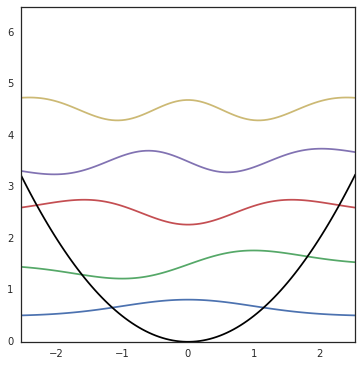

In [34]:
plot_HO(5)

There are a lot of built in plots, mostly for discrete data points and statistics. I mostly use the color palettes and things like that, but if you need to do statistical plots, look no further

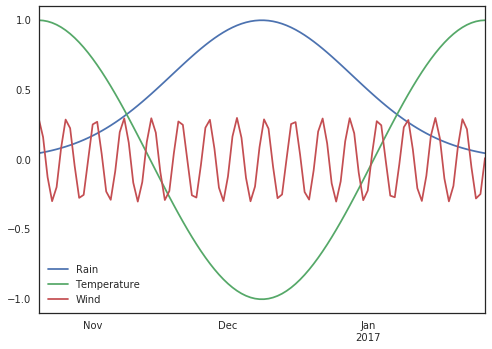

In [55]:
Cols = ['Rain', 'Temperature', 'Wind']
N = 100
Dates = pd.date_range('20161020', periods=N)

from scipy.signal import gaussian
rain = gaussian(N, 20)         
Temp = np.cos(np.linspace(0, 6.28, N))
Wind = np.cos(np.arange(N)) * 0.3
data = np.zeros((N,3))
data[:, 0] = rain
data[:, 1] = Temp
data[:, 2] = Wind

df2 = pd.DataFrame(data, index=Dates, columns=Cols)
df2.plot()
plt.ylim(-1.1, 1.1)
plt.show()

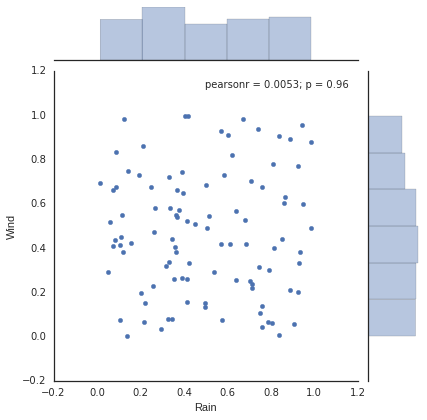

In [44]:
sns.jointplot(x='Rain', y='Wind', data=df2)

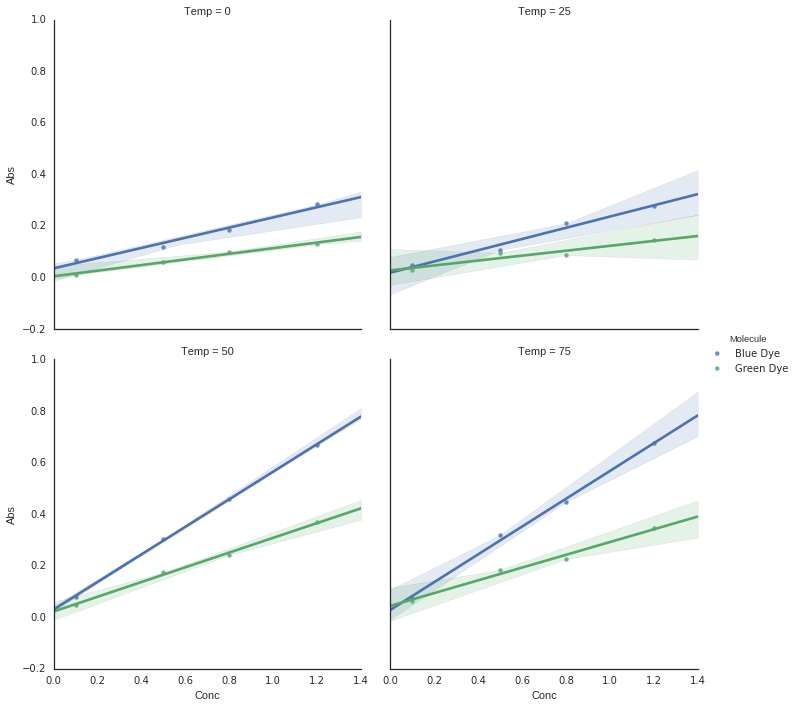

In [39]:
cols = ['Abs', 'Conc', 'Molecule', 'Temp']

Temps = [0, 25, 50, 75]
Molecules = ['Blue Dye', 'Green Dye']
Absorptivity = [0.2, 0.1]   # whatever units makes this reasonable
Concs = [0.1, 0.5, 0.8, 1.2]

data = []
for temp in Temps:
    for j in range(len(Molecules)):
        for conc in Concs:
            A = Absorptivity[j] * conc * np.exp((273 + temp) / 300)
            A += np.random.rand() * 0.05
            data.append([A, conc, Molecules[j], temp])
            
AbsDF = pd.DataFrame(data, columns=cols)
sns.lmplot(x='Conc', y='Abs', hue='Molecule', 
           col='Temp', data=AbsDF, col_wrap=2)
plt.show()